In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the Initial Dataset

In [2]:
# Load the data
file_path = "../Dataset/sales_data.csv"
df = pd.read_csv(file_path)

# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

In [3]:
df.head()

,InvoiceNo,Date,Country,ProductID,Shop,Gender,Size (US),Size (Europe),Size (UK),UnitPrice,Discount,Year,Month,SalePrice
0,52389,2014-01-01,United Kingdom,2152,UK2,Male,11.0,44,10.5,159,0.0,2014,1,159.0
1,52390,2014-01-01,United States,2230,US15,Male,11.5,44-45,11.0,199,0.2,2014,1,159.2
2,52391,2014-01-01,Canada,2160,CAN7,Male,9.5,42-43,9.0,149,0.2,2014,1,119.2
3,52392,2014-01-01,United States,2234,US6,Female,9.5,40,7.5,159,0.0,2014,1,159.0
4,52393,2014-01-01,United Kingdom,2222,UK4,Female,9.0,39-40,7.0,159,0.0,2014,1,159.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14967 entries, 0 to 14966
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   InvoiceNo      14967 non-null  int64         
 1   Date           14967 non-null  datetime64[ns]
 2   Country        14967 non-null  object        
 3   ProductID      14967 non-null  int64         
 4   Shop           14967 non-null  object        
 5   Gender         14967 non-null  object        
 6   Size (US)      14967 non-null  float64       
 7   Size (Europe)  14967 non-null  object        
 8   Size (UK)      14967 non-null  float64       
 9   UnitPrice      14967 non-null  int64         
 10  Discount       14967 non-null  float64       
 11  Year           14967 non-null  int64         
 12  Month          14967 non-null  int64         
 13  SalePrice      14967 non-null  float64       
dtypes: datetime64[ns](1), float64(4), int64(5), object(4)
memory usage: 1.

In [5]:
###
### We only need two columns
### 1. Date
### 2. Total Sales for each date
###

# Aggregate data by date to get total sales per day
daily_sales = df.groupby('Date').sum()['SalePrice']

# Create a new DataFrame with 'Date' and 'Total Sales' columns
df_date_sales = pd.DataFrame({'Date': daily_sales.index, 'Total Sales': daily_sales.values})

In [6]:
df_date_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1096 entries, 0 to 1095
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         1096 non-null   datetime64[ns]
 1   Total Sales  1096 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 17.2 KB


In [7]:
df_date_sales.head()

,Date,Total Sales
0,2014-01-01,914.4
1,2014-01-02,1195.1
2,2014-01-03,1159.6
3,2014-01-04,1087.5
4,2014-01-05,876.4


Next we would like to see if there are empty dates (dates without any sales)

In [8]:
# Check the minimum and maximum dates
min_date = df_date_sales['Date'].min().strftime('%Y-%m-%d')
max_date = df_date_sales['Date'].max().strftime('%Y-%m-%d')

# Generate a complete date range from min_date to max_date
complete_date_range = pd.date_range(start=min_date, end=max_date)

# Identify missing dates
missing_dates = complete_date_range.difference(df_date_sales['Date'])

# Output the results
print(f"Minimum Date: {min_date}")
print(f"Maximum Date: {max_date}")
print(f"Missing Dates: {missing_dates}")

Minimum Date: 2014-01-01
Maximum Date: 2016-12-31
Missing Dates: DatetimeIndex([], dtype='datetime64[ns]', freq='D')


We can see that for every day, from the first day of 2014 untill the end of 2016, there are always sales.

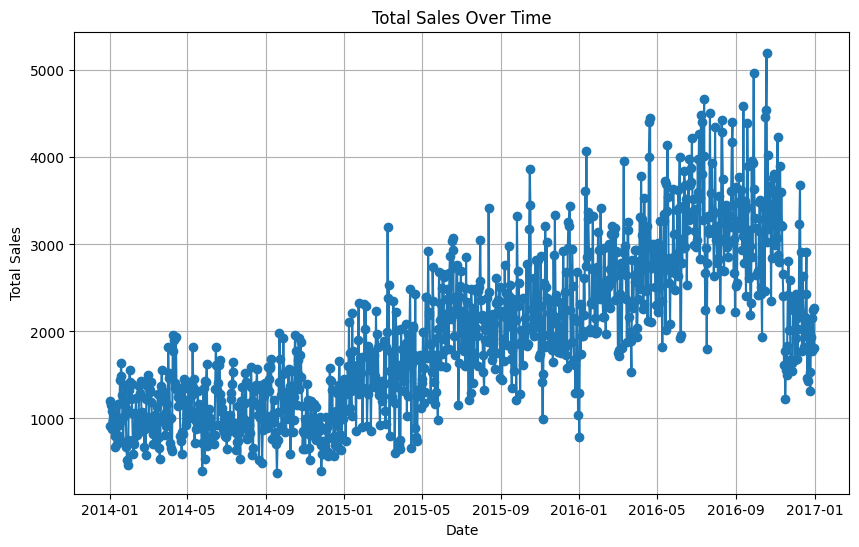

In [9]:
# Plot the date against total sales
plt.figure(figsize=(10, 6))
plt.plot(df_date_sales['Date'], df_date_sales['Total Sales'], marker='o', linestyle='-')
plt.title('Total Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()

Feels like there are some anomality at the end of 2016, so I will remove it.

In [10]:
# Filter out the data from September 2016
df_date_sales = df_date_sales[~(df_date_sales['Date'] >= '2016-09-01')]

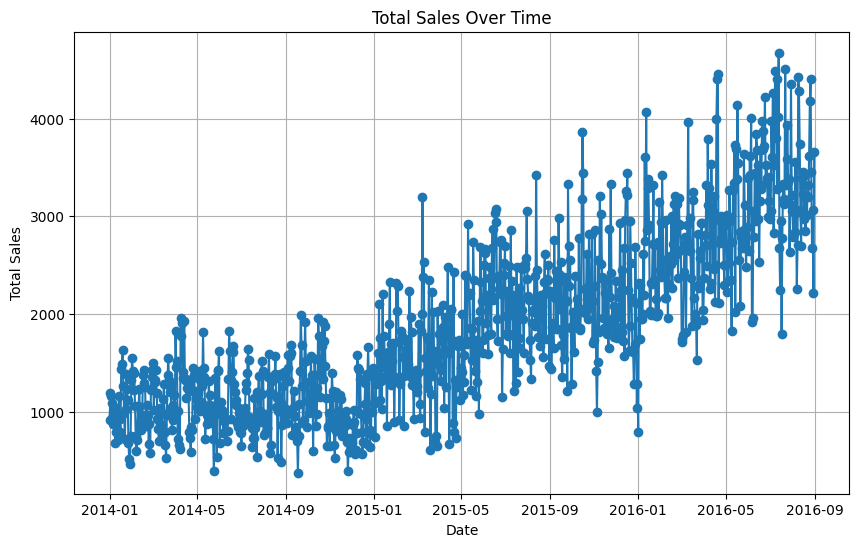

In [12]:
# Plot the date against total sales
plt.figure(figsize=(10, 6))
plt.plot(df_date_sales['Date'], df_date_sales['Total Sales'], marker='o', linestyle='-')
plt.title('Total Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()

In [13]:
# Save the DataFrame to a CSV file
df_date_sales.to_csv("../Dataset/sales_data_processed.csv", index=False)